## Eval IO AE Correlation Patient-specific

In [1]:
import os
import pickle
import datetime

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from preepiseizures.src import Patient, biosignal_processing
import Respiration_2023

In [2]:
patient = 'YWJN'

data = pd.read_parquet('data/respiration/{patient}_all_respiration_data.parquet'.format(patient=patient))

patient_info = Patient.patient_class(patient)
patient_info.get_seizure_annotations()
patient_info.seizure_table

# data['datetime'] += pd.Timedelta(patient_info.patient_dict['temporal_shift'])


,Crises,Data,Hora Clínica,Localização,lado,Focal / Generalisada,Unnamed: 6,Unnamed: 7,Sono/ Vigília,Tipo,"Intervalo (10,10) onset no Bitalino",Timestamp
0,Crise 1,2020-01-07,14:14:30,temporal,E,F,NaN,NaN,Vígilia,Focal simples,0,2020-01-07 14:14:30
1,Crise 2,2020-01-07,19:21:58,sem alts,na,F(ME),Excluir,NaN,Vígilia,Focal simples,18:58:00,2020-01-07 19:21:58
2,Crise 3,2020-01-07,23:21:27,sem alts,na,F(ME),Excluir,NaN,Vígilia,Focal simples,19:26:00,2020-01-07 23:21:27
3,Crise 4,2020-01-08,18:50:21,sem alts,na,F(ME),Excluir,NaN,Vígilia,Focal simples,18:51:00,2020-01-08 18:50:21
4,Crise 5,2020-01-09,12:03:49,temporo-parietal,E,FBTC,NaN,NaN,Vígilia,Generalização Tónico-clónica,00:00:00,2020-01-09 12:03:49
5,Crise 6,2020-01-09,21:03:04,temporal,E,FBTC,NaN,NaN,Vígilia,Generalização Tónico-clónica,18:22:00,2020-01-09 21:03:04
6,Crise 7,2020-01-10,00:59:30,temporal,E,FBTC,NaN,NaN,Vígilia,Generalização Tónico-clónica,19:12:00,2020-01-10 00:59:30
7,Crise 8,2020-01-10,08:57:00,temporal,E,FBTC,NaN,NaN,Vígilia,Generalização Tónico-clónica,NaN,2020-01-10 08:57:00


In [3]:
corr_points = pd.read_parquet('preepiseizures/sudep_analysis/{patient}_corr_points_1s.parquet'.format(patient=patient))

In [4]:
corr_points.index.name = 'datetime'
corr_points.reset_index(inplace=True)

In [5]:
# corr points during seizures
for seiz in range(len(patient_info.seizure_table)):
    onset = patient_info.seizure_table.iloc[seiz]['Timestamp']
    corr_seizure = corr_points.loc[(corr_points['datetime'] >= onset - pd.Timedelta(minutes=60)) & (corr_points['datetime'] <= onset + pd.Timedelta(minutes=60))]
print(patient_info.seizure_table)

    Crises       Data Hora Clínica       Localização lado  \
0  Crise 1 2020-01-07     14:14:30          temporal    E   
1  Crise 2 2020-01-07     19:21:58          sem alts   na   
2  Crise 3 2020-01-07     23:21:27          sem alts   na   
3  Crise 4 2020-01-08     18:50:21          sem alts   na   
4  Crise 5 2020-01-09     12:03:49  temporo-parietal    E   
5  Crise 6 2020-01-09     21:03:04          temporal    E   
6  Crise 7 2020-01-10     00:59:30          temporal    E   
7  Crise 8 2020-01-10     08:57:00          temporal    E   

  Focal / Generalisada Unnamed: 6  Unnamed: 7 Sono/ Vigília  \
0                    F        NaN         NaN       Vígilia   
1                F(ME)    Excluir         NaN       Vígilia   
2                F(ME)    Excluir         NaN       Vígilia   
3                F(ME)    Excluir         NaN       Vígilia   
4                 FBTC        NaN         NaN       Vígilia   
5                 FBTC        NaN         NaN       Vígilia   
6        

In [6]:
corr_points

,datetime,corr
0,2020-01-08 06:43:17.250812344,0.980297
1,2020-01-08 06:44:17.251004038,0.977876
2,2020-01-08 06:45:17.251195732,0.961042
3,2020-01-08 06:46:17.251387426,0.980273
4,2020-01-08 06:47:17.251579120,0.962121
...,...,...
1003,2020-01-10 09:03:17.254369029,0.950052
1004,2020-01-10 09:10:17.250605739,0.983405
1005,2020-01-10 09:18:17.256501268,0.978271
1006,2020-01-10 09:19:17.259358558,0.946327


In [7]:
fig = px.line(corr_points, x='datetime', y='corr',  title='Correlation between respiration and EEG')

for o in range(len(patient_info.seizure_table)):
    onset = patient_info.seizure_table.iloc[o]['Timestamp']
    fig.add_vline(x=onset, line_width=1, line_dash="dash", line_color="red")
fig.show()

In [46]:
resp_rate, resp_times = biosignal_processing.resp_rate(data['RESP'], 80)

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



In [47]:
resp_rate_df = pd.DataFrame({'datetime': data.iloc[resp_times]['datetime'], 'resp_rate': resp_rate})

IndexError: positional indexers are out-of-bounds

In [ ]:
fig = px.scatter(resp_rate_df, x='datetime', y='resp_rate',  title='Correlation between respiration and EEG')

for o in range(len(patient_info.seizure_table)):
    onset = patient_info.seizure_table.iloc[o]['Timestamp']
    fig.add_vline(x=onset, line_width=1, line_dash="dash", line_color="red")
fig.update_yaxes(range=[0, 40])  
fig.show()

In [ ]:
fictional_time = datetime.datetime(2021, 1, 1, 0, 0, 0)
data_seizures = pd.DataFrame()
corr_points_seizures = pd.DataFrame()
# get seizure times
for i in range(len(patient_info.seizure_table)):
    #if patient_info.seizure_table.iloc[i]['Focal / Generalisada'] != 'FBTC':
    #    continue
    onset = patient_info.seizure_table['Timestamp'].iloc[i]
    start = onset - pd.Timedelta(minutes=60)
    end = onset + pd.Timedelta(minutes=60)
    seizure_i_data = data.loc[data['datetime'].between(start, end)].copy()
    if seizure_i_data.empty:
        continue
    seizure_i_data['seizure'] = i
    seizure_i_data['relative_time'] = seizure_i_data['datetime'] - onset
    seizure_i_data['onset'] = False
    seizure_i_data['onset'].iloc[np.argmin(np.abs(seizure_i_data['relative_time']))] = True
    corr_points_seizure_i = corr_points.loc[corr_points['datetime'].between(start, end)].copy()
    if corr_points_seizure_i.empty:
        continue
    corr_points_seizure_i['seizure'] = i
    corr_points_seizure_i['relative_time'] = corr_points_seizure_i['datetime'] - onset
    corr_points_seizure_i['onset'] = False
    corr_points_seizure_i['onset'].iloc[np.argmin(np.abs(corr_points_seizure_i['relative_time']))] = True

    seizure_i_data['fictional_time'] = fictional_time + seizure_i_data['relative_time']
    corr_points_seizure_i['fictional_time'] = fictional_time + corr_points_seizure_i['relative_time']
    seizure_i_data['index'] = np.arange(len(seizure_i_data))
    resp_rate, resp_times = biosignal_processing.resp_rate(seizure_i_data['RESP'], 80)
    seizure_i_data['resp_rate'] = np.nan
    seizure_i_data['resp_rate'].iloc[np.array(resp_times)-1] = resp_rate
    data_seizures = pd.concat((data_seizures, seizure_i_data), ignore_index=True)
    corr_points_seizure_i['corr'] = corr_points_seizure_i['corr'].astype(float)
    corr_points_seizure_i['index'] = np.arange(len(corr_points_seizure_i))
    #corr_points_seizure_i['label'] = np.hstack(['preictal'] * len(corr_points_seizure_i.loc[corr_points_seizure_i['datetime'].
    #                                                                              between(start, onset)]) + ['ictal'] * len(corr_points_seizure_i.loc[corr_points_seizure_i['datetime'].between(onset, onset + pd.Timedelta(minutes=2))]) + ['postictal'] * len(corr_points_seizure_i.loc[corr_points_seizure_i['datetime'].between(onset + pd.Timedelta(minutes=2), end)]))
    corr_points_seizures = pd.concat((corr_points_seizures, corr_points_seizure_i), ignore_index=True)

In [ ]:
data_seizures

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning:

sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning:

sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



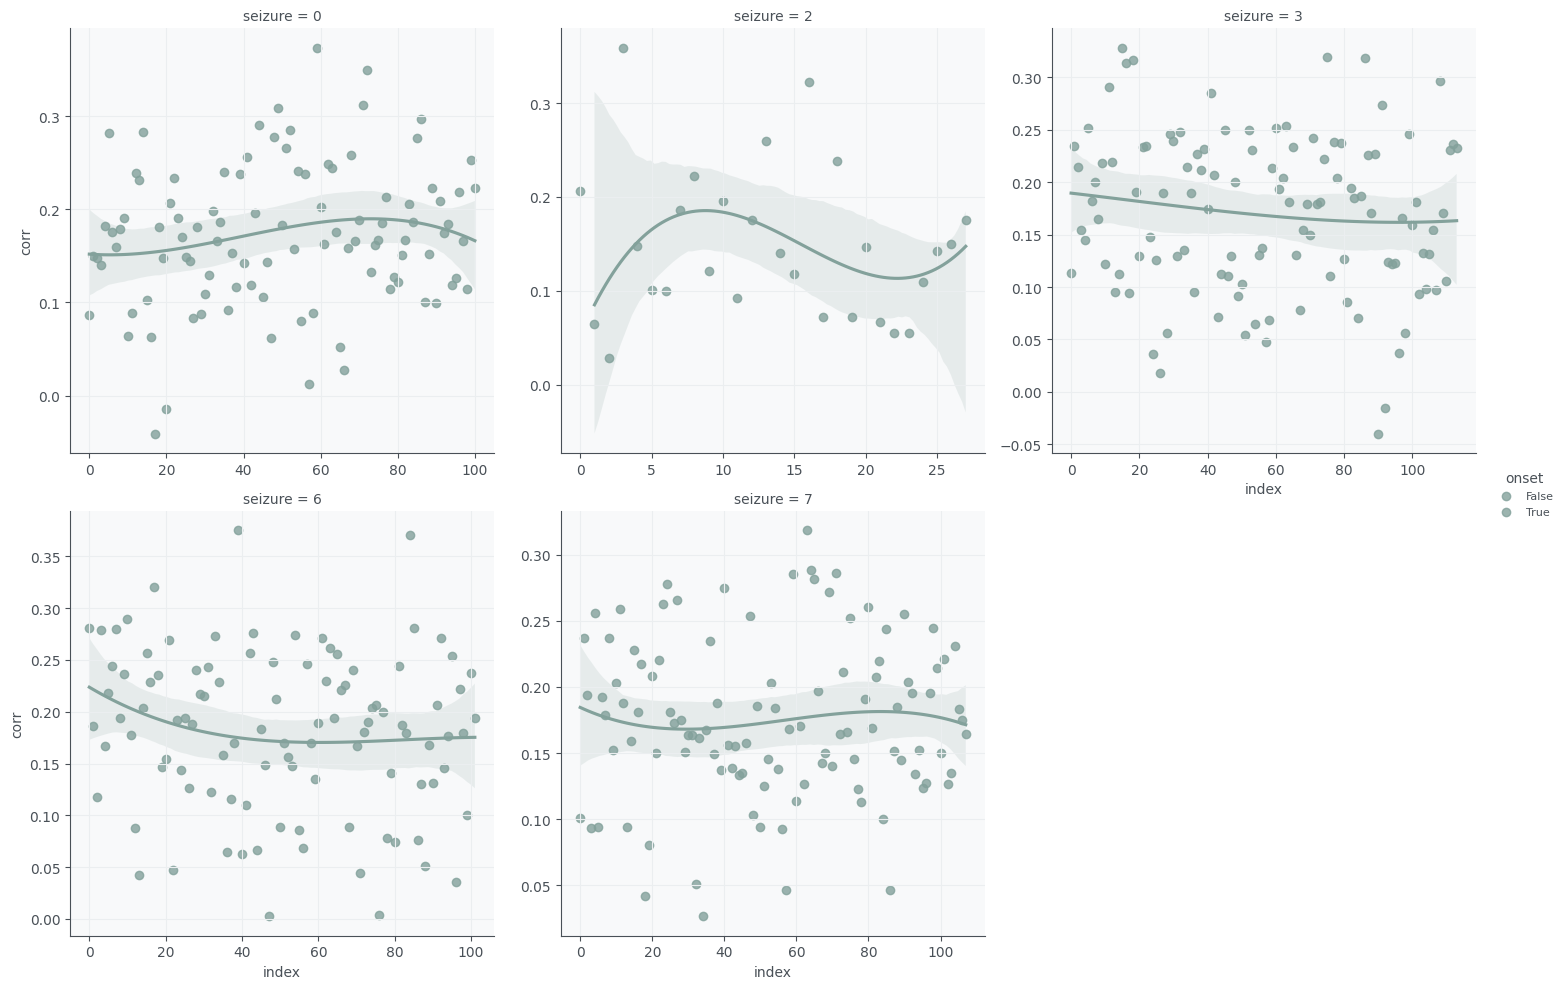

In [ ]:

fig = sns.lmplot( data=corr_points_seizures, hue='onset', palette=['#83A19B'], y='corr', x='index', col='seizure', order=3, fit_reg=True, col_wrap=3, sharex=False, sharey=False)
i = 1

for axis in fig.axes:
    seizure_i_data = corr_points_seizures.loc[corr_points_seizures['seizure']==i].copy()
    if seizure_i_data.empty:
        continue
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('Correlation Points')
    axis.set_ylim(-1, 1)#seizure_i_data['resp_rate'].max()+1)
    axis.lines[0].set_color('#03587B')
    axis.set_xticks(seizure_i_data['index'][::len(seizure_i_data)//8])
    axis.set_xticklabels(seizure_i_data['datetime'][::len(seizure_i_data)//8].dt.strftime('%H:%M:%S'), rotation=45)
    axis.vlines(seizure_i_data.loc[seizure_i_data['onset']==True, 'index'], -1, 1, color='#951428')
    i += 1

plt.savefig(f'data/figures{os.sep}{patient}_correlation_seizures.pdf')
# plt.xticks(corr_points_seizure_i['index'][::100], corr_points_seizure_i['relative_time'][::100], rotation=45)

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning:

sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning:

sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



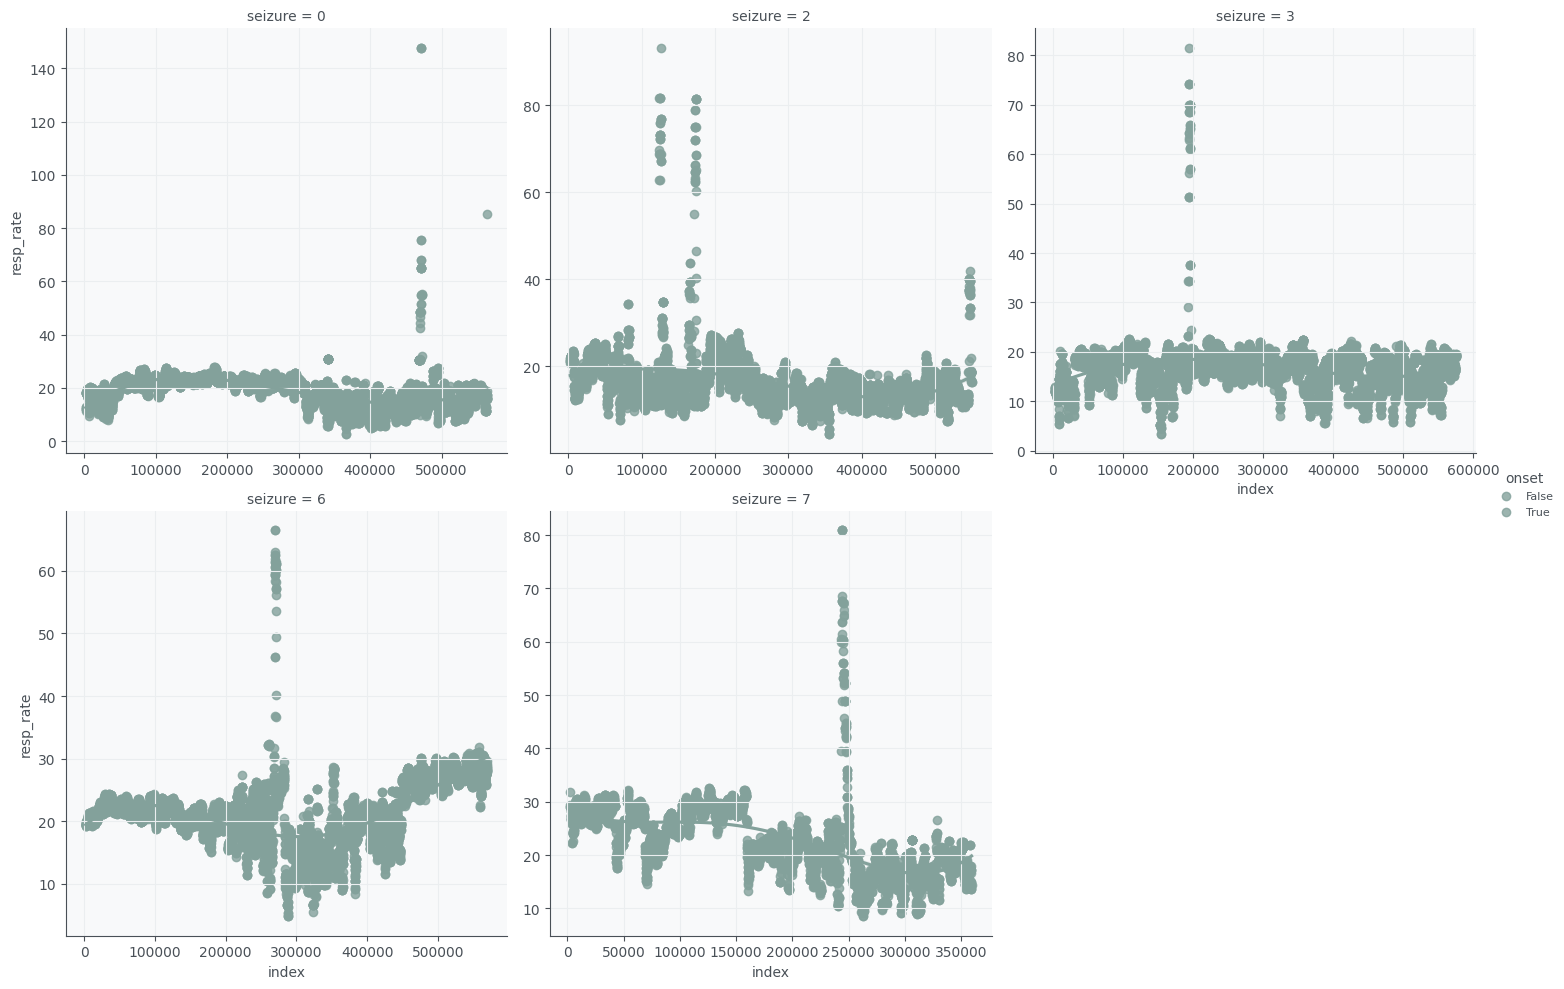

In [ ]:

fig = sns.lmplot( data=data_seizures, hue='onset', palette=['#83A19B'], y='resp_rate', x='index', col='seizure', order=4, fit_reg=True, col_wrap=3, sharex=False, sharey=False)
i = 1

for axis in fig.axes:
    seizure_i_data = data_seizures.loc[data_seizures['seizure']==i].copy()
    if seizure_i_data.empty:
        continue
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('Respiration rate (breaths/min)')
    axis.set_ylim(0, 35)#seizure_i_data['resp_rate'].max()+1)
    axis.lines[0].set_color('#03587B')
    axis.set_xticks(seizure_i_data['index'][::len(seizure_i_data)//8])
    axis.set_xticklabels(seizure_i_data['datetime'][::len(seizure_i_data)//8].dt.strftime('%H:%M:%S'), rotation=45)
    axis.vlines(seizure_i_data.loc[seizure_i_data['onset']==True, 'index'], 0, 50, color='#951428')
    i += 1

plt.savefig(f'data/figures{os.sep}{patient}_respiration_rate_seizures.pdf')

In [ ]:
patient_info.seizure_table